In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from wordcloud import WordCloud
from tabulate import tabulate

In [2]:
df = pd.read_csv("C:/Users/ASUS/Desktop/Data Analyst - Test Data - US.csv")

In [3]:
df.isnull().sum()

Review        55
date           0
Location    4737
ID             0
dtype: int64

In [4]:
df = df.reset_index(drop=True)

In [5]:
df.to_csv('2')

In [6]:
df = pd.read_csv("C:/Users/ASUS/Desktop/2.csv")

In [7]:
df

,ID,Review,date,Location,Corpus
0,1,I was very impressed with the resort.\n Great ...,19-Aug,Sebastian,impressed resort great staff main resort pool ...
1,2,The rooms were nice the outside needs work als...,19-Aug,Los Angeles,room nice outside need work also free breakfas...
2,3,Great location! I have stayed at this hotel on...,19-Aug,Georgia,great location stayed hotel last three trip ne...
3,4,"Great location, room was large and spacious. P...",19-Aug,Palm Harbor,great location room large spacious parking eas...
4,5,Very clean and friendly and I love the locatio...,19-Aug,California,clean friendly love location restaurant inside...
...,...,...,...,...,...
1700,1701,"·the staff were all so friendly. frank, the ch...",19-Jul,United States of America,staff friendly frank chef buffet bar top meeti...
1701,1702,·the internet barely worked or didn't work,19-Jul,United States of America,internet barely worked work
1702,1703,·the location was great.\n \n \n \n \n ·the be...,19-Jul,United States of America,location great bed uncomfortable bed ever
1703,1704,·we were early for check in and the staff was ...,19-Jul,United States of America,early check staff accommodating able check sev...


In [8]:
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    reviews = re.sub(r'[^a-zA-Z]', ' ', str(df['Review'][i]))
    reviews = reviews.lower()
    reviews = reviews.split()
    
    reviews= [lemmatizer.lemmatize(word) for word in reviews if not word in set(stopwords.words('english'))]
    reviews = ' '.join(reviews)
    corpus.append(reviews)

In [9]:
df['Corpus'] = corpus

In [10]:
sia = SentimentIntensityAnalyzer()
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    Review = row['ID']
    Corpus = row['Corpus']
    res[Review] = sia.polarity_scores(Corpus)

  0%|          | 0/1705 [00:00<?, ?it/s]

In [11]:
vaders = pd.DataFrame(res).T

In [12]:
vaders = vaders.reset_index().rename(columns = {'index':'ID'})

In [13]:
vaders =vaders.merge(df, how = 'left')

In [14]:
date_wise = vaders['date'].value_counts()

In [15]:
date_wise

19-Jul    231
18-Oct    186
18-Nov    154
19-Aug    153
18-Sep    150
19-Apr    135
19-Mar    130
18-Aug    123
18-Dec    113
19-May    108
19-Jan    100
19-Feb     66
19-Jun     56
Name: date, dtype: int64

Text(0.5, 1.0, 'Reviews Posted Monthly')

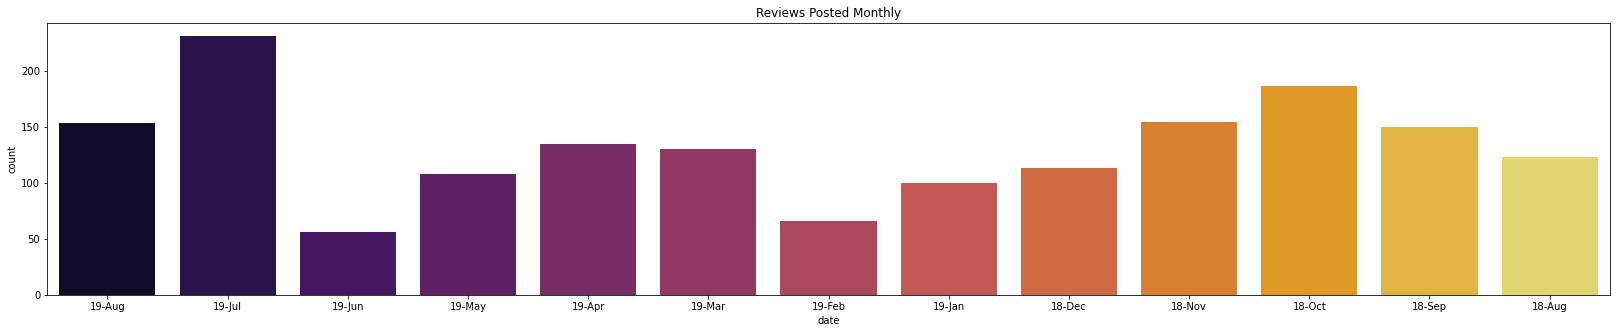

In [16]:
plt.figure(figsize=(28,5))
sns.countplot(x="date", data=vaders,palette='inferno')
plt.rcParams.update({'font.size':10})
plt.xticks(rotation = 0)
plt.title('Reviews Posted Monthly')


In [17]:
vaders.rename(columns = {'neg':'Negative', 'neu':'Neutral', 'pos' : 'Positive'}, inplace = True)

In [18]:
vaders

,ID,Negative,Neutral,Positive,compound,Review,date,Location,Corpus
0,1,0.000,0.500,0.500,0.9325,I was very impressed with the resort.\n Great ...,19-Aug,Sebastian,impressed resort great staff main resort pool ...
1,2,0.000,0.498,0.502,0.8779,The rooms were nice the outside needs work als...,19-Aug,Los Angeles,room nice outside need work also free breakfas...
2,3,0.000,0.728,0.272,0.6249,Great location! I have stayed at this hotel on...,19-Aug,Georgia,great location stayed hotel last three trip ne...
3,4,0.000,0.400,0.600,0.9260,"Great location, room was large and spacious. P...",19-Aug,Palm Harbor,great location room large spacious parking eas...
4,5,0.000,0.476,0.524,0.9477,Very clean and friendly and I love the locatio...,19-Aug,California,clean friendly love location restaurant inside...
...,...,...,...,...,...,...,...,...,...
1700,1701,0.000,0.684,0.316,0.9682,"·the staff were all so friendly. frank, the ch...",19-Jul,United States of America,staff friendly frank chef buffet bar top meeti...
1701,1702,0.000,1.000,0.000,0.0000,·the internet barely worked or didn't work,19-Jul,United States of America,internet barely worked work
1702,1703,0.243,0.374,0.383,0.3612,·the location was great.\n \n \n \n \n ·the be...,19-Jul,United States of America,location great bed uncomfortable bed ever
1703,1704,0.000,1.000,0.000,0.0000,·we were early for check in and the staff was ...,19-Jul,United States of America,early check staff accommodating able check sev...


<Figure size 2016x360 with 0 Axes>

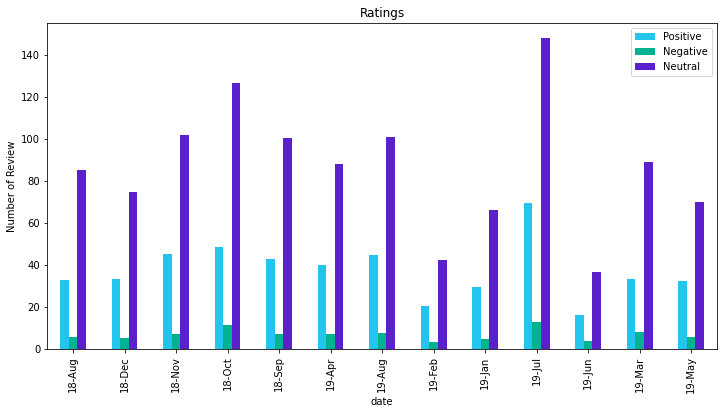

In [19]:
plt.figure(figsize=(28,5))
ax = vaders.groupby('date')[['Positive','Negative','Neutral']].sum().plot.bar(figsize=(12,6),color = ['#23C4ED','#02B290','#5A20CB'])
ax.set_ylabel('Number of Review')
ax.set_title('Ratings')
ax.legend()


In [20]:
from collections import Counter
Most_common_words = Counter(" ".join(vaders['Corpus']).split()).most_common(100)

In [21]:
Most_common_words

[('read', 3054),
 ('le', 1564),
 ('room', 1268),
 ('hotel', 799),
 ('staff', 566),
 ('great', 433),
 ('location', 417),
 ('clean', 389),
 ('nice', 378),
 ('stay', 342),
 ('time', 255),
 ('bed', 252),
 ('friendly', 240),
 ('good', 233),
 ('pool', 232),
 ('would', 221),
 ('property', 215),
 ('night', 197),
 ('check', 195),
 ('service', 184),
 ('day', 183),
 ('desk', 174),
 ('one', 173),
 ('u', 171),
 ('parking', 169),
 ('like', 167),
 ('front', 154),
 ('disney', 147),
 ('area', 146),
 ('small', 145),
 ('close', 144),
 ('get', 143),
 ('helpful', 139),
 ('bathroom', 135),
 ('restaurant', 133),
 ('really', 130),
 ('back', 125),
 ('comfortable', 120),
 ('also', 118),
 ('park', 118),
 ('breakfast', 117),
 ('everything', 117),
 ('could', 114),
 ('place', 111),
 ('lobby', 110),
 ('need', 106),
 ('new', 106),
 ('well', 105),
 ('de', 104),
 ('old', 102),
 ('price', 100),
 ('door', 99),
 ('stayed', 97),
 ('resort', 96),
 ('floor', 96),
 ('lot', 96),
 ('shower', 94),
 ('next', 93),
 ('got', 93),
 (

In [22]:
d = pd.DataFrame(Most_common_words,columns=['Words','Count'])

In [23]:
d

,Words,Count
0,read,3054
1,le,1564
2,room,1268
3,hotel,799
4,staff,566
...,...,...
95,shuttle,63
96,building,63
97,easy,62
98,family,62


In [24]:
text = " ".join(Word.split()[0] for Word in d.Words)

In [25]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

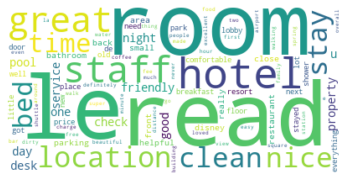

<Figure size 1440x720 with 0 Axes>

In [26]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[20,10])
plt.show()

In [27]:
Positive_Review = vaders['Positive'].sum()

In [28]:
Negative_Review = vaders['Negative'].sum()

In [29]:
Neutral_Review = vaders['Neutral'].sum()

In [30]:
Total_Review = vaders['ID'].count()

In [31]:
Positive_Review.round()*100/Total_Review

28.563049853372434

In [32]:
Negative_Review.round()*100/Total_Review


5.219941348973607

In [33]:
Neutral_Review.round()*100/Total_Review

66.158357771261

In [34]:
Total_Review

1705

In [35]:
data = [['Positive_Review', 487, 28.563049853372434] , ['Negative_Review' , 88, 5.219941348973607] , ['Neutral_Review' , 1128, 66.158357771261]]
head = ['Sentiment', 'Count', 'Percentage']
print("*** Reviews According to Percentage - After Dropping Null Values ***")
t = tabulate(data, headers=head, tablefmt="grid")
print(t)

*** Reviews According to Percentage - After Dropping Null Values ***
+-----------------+---------+--------------+
| Sentiment       |   Count |   Percentage |
+=================+=========+==============+
| Positive_Review |     487 |     28.563   |
+-----------------+---------+--------------+
| Negative_Review |      88 |      5.21994 |
+-----------------+---------+--------------+
| Neutral_Review  |    1128 |     66.1584  |
+-----------------+---------+--------------+


In [36]:
vaders['Location'].value_counts().head(5)

United States of America    116
New York                     34
San Jose                     19
California                   19
Florida                      16
Name: Location, dtype: int64